In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import math

import pandas as pd

%cd C:\Users\praga\Downloads\PRML\Assign1
df=pd.read_csv('Dataset.csv',header = None)
X=df.to_numpy()

C:\Users\praga\Downloads\PRML\Assign1


In [3]:
musi=np.random.choice(len(X),5,replace=False)


In [4]:
def Kmeans(X,K):#returns clusters, errors,means
    mus=musi[:K]
    means=X[mus]
    clustinds=np.array([0 for i in range(len(X))])
    dist=np.array([[0.0 for j in range(len(means))] for i in range(len(X))])
    errorfunc=[]
    distmat=get_dist(means,X)
    clustinds=np.argmin(distmat,axis=1)
    loss=np.sum(np.min(distmat,axis=1))
    errorfunc.append(loss)
    noconv=1
    while noconv:
        loss=0
        means=get_means(K,clustinds,X)#means step
        distmat=get_dist(means,X)
        clustinds=np.argmin(distmat,axis=1)
        loss=np.sum(np.min(distmat,axis=1))
        if loss==errorfunc[-1]:
            noconv=0
        errorfunc.append(loss)
    return means, clustinds, errorfunc

In [5]:
def get_means(K,clustind,X):
    means=np.zeros((K,2))
    meanscount=np.zeros(K)
    for i in range(len(X)):
        means[clustind[i]]+=X[i]
        meanscount[clustind[i]]+=1
    for r in range(K):
        means[r]=means[r]/meanscount[r]
    return means
    

In [6]:
def get_dist(means,X):
    dist=np.array([[0.0 for j in range(len(means))] for i in range(len(X))])
    for i in range(len(X)):
        dist[i]=np.sum((X[i]-means)**2,axis=1)
    return dist
        
    

In [7]:
def isinc(A):
    for i in range(len(A)-1):
        if A[i]<A[i+1]:
            return A[i]
    return True

In [8]:
k2=Kmeans(X,2)

In [9]:
k3=Kmeans(X,3)

In [10]:
k4=Kmeans(X,4)

In [11]:
k5=Kmeans(X,5)

Text(0.5, 1.0, 'Error Function- 2 means')

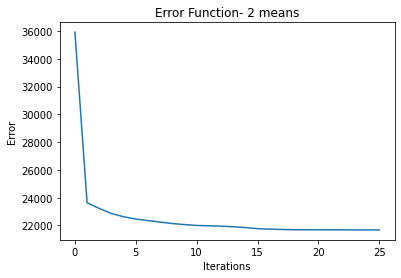

In [12]:
plt.plot(k2[-1])
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error Function- 2 means")

Text(0.5, 1.0, 'Error Function- 3 means')

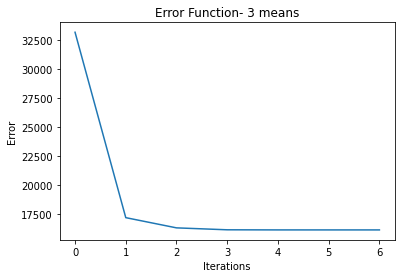

In [27]:
plt.plot(k3[-1])
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error Function- 3 means")

Text(0.5, 1.0, 'Error Function- 4 means')

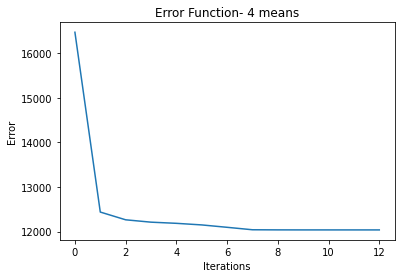

In [28]:
plt.plot(k4[-1])
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error Function- 4 means")

Text(0.5, 1.0, 'Error Function- 5 means')

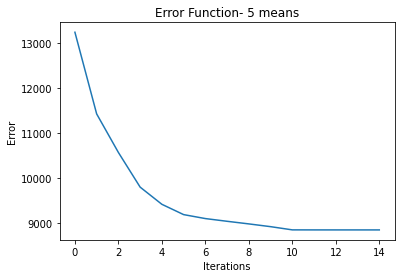

In [29]:
plt.plot(k5[-1])
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Error Function- 5 means")

In [16]:
arr=[]
for i in range(-100,100):
    for j in range(-100,100):
        arr.append([i/10,j/10])


In [17]:
from scipy.spatial import Voronoi, voronoi_plot_2d
def plotter(a):
    means=a[0]
    K=len(a[0])


    #----------------

    distmatfull=get_dist(means,arr)
    clustindsfull=np.argmin(distmatfull,axis=1)
    clusters1=[[] for i in range(K)]
    for t in range(len(arr)):
        clusters1[clustindsfull[t]].append(arr[t])
        
    if K==2:        
        plt.axline((means[0][0]/2+means[1][0]/2, means[0][1]/2+means[1][1]/2), slope=-(means[1][0]-means[0][0])/(means[1][1]-means[0][1]),c='black')

    if K>2:
        vor = Voronoi(means)
        voronoi_plot_2d(vor, show_vertices=False, line_colors='black',

                        line_width=2, line_alpha=0.6, point_size=4)

    plt.scatter(np.array(clusters1[0])[:,0],np.array(clusters1[0])[:,1],marker='+',color='mistyrose',label='_nolegend_')
    if K>1:
        plt.scatter(np.array(clusters1[1])[:,0],np.array(clusters1[1])[:,1],marker='+',color='lightgreen',label='_nolegend_')
    if K>2:
        plt.scatter(np.array(clusters1[2])[:,0],np.array(clusters1[2])[:,1],marker='+',color='lightblue',label='_nolegend_')
    if K>3:
        plt.scatter(np.array(clusters1[3])[:,0],np.array(clusters1[3])[:,1],marker='+',color='lightyellow',label='_nolegend_')
    if K>4:
        plt.scatter(np.array(clusters1[4])[:,0],np.array(clusters1[4])[:,1],marker='+',color='plum',label='_nolegend_')
        
    plt.scatter(means[:,0],means[:,1],marker='o',color='orange')

    clusters=[[] for i in range(K)]
    for t in range(len(X)):
        clusters[a[1][t]].append(X[t])


    plt.scatter(np.array(clusters[0])[:,0],np.array(clusters[0])[:,1],marker='*',color='r',label='Cluster 1')
    if K>1:
        plt.scatter(np.array(clusters[1])[:,0],np.array(clusters[1])[:,1],marker='*',color='g',label='Cluster 2')
    if K>2:
        plt.scatter(np.array(clusters[2])[:,0],np.array(clusters[2])[:,1],marker='*',color='b',label='Cluster 3')
    if K>3:
        plt.scatter(np.array(clusters[3])[:,0],np.array(clusters[3])[:,1],marker='*',color='y',label='Cluster 4')
    if K>4:
        plt.scatter(np.array(clusters[4])[:,0],np.array(clusters[4])[:,1],marker='*',color='darkviolet',label='Cluster 5')
        
        
    plt.scatter(means[:,0],means[:,1],marker='D',color='black',label='Means')
    plt.xlabel("X: 1st Component->")
    plt.xlabel("X: 2nd Component->")
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.legend()
    plt.title('Kmeans with # clusters:-'+str(K))




    plt.show()

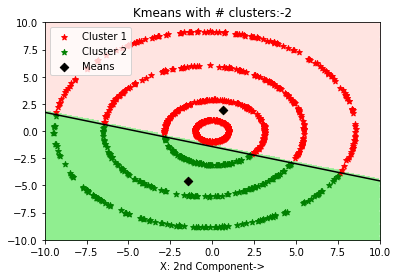

In [18]:
plotter(k2)

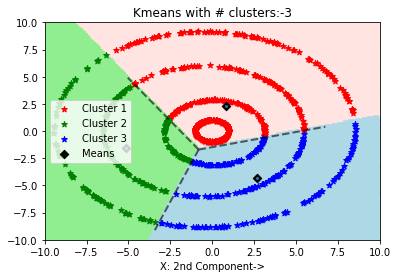

In [19]:
plotter(k3)

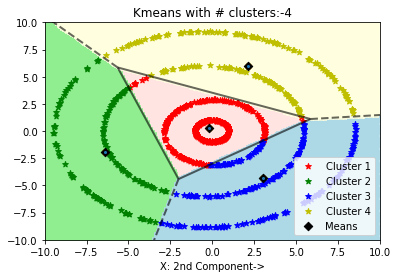

In [20]:
plotter(k4)

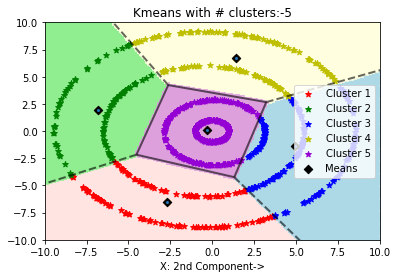

In [30]:
plotter(k5)

In [32]:
k2[-1][-1],k3[-1][-1],k4[-1][-1],k5[-1][-1]

(21678.99850693509, 16172.47977918421, 12035.904320472775, 8857.12464461779)